In [110]:
# importing the necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE 
from scipy import stats as stats
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,\
roc_curve,roc_auc_score,classification_report, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from scipy.stats import randint
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.sparse import csr_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

#### DATA UNDERSTANDING

Load the dataset

In [2]:
# Load the data into a dataframe and read the first five rows
df = pd.read_csv('combined_dta.csv', encoding='ISO-8859-1')

df.head()

,web-scraper-order,web-scraper-start-url,product,product-href,product_name,image,price,brand,link,link-href,see_all,see_all-href,review_title,review,ratings,user_name,date,see_all_link,see_all_link-href,Category
0,1730407108-1,https://www.jumia.co.ke/computer-accessories/,Black Friday dealLaptop Skin Wrap Vinyl from 1...,https://www.jumia.co.ke/generic-laptop-skin-wr...,Laptop Skin Wrap Vinyl from 12-17.0 inches Lap...,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,KSh 699 - KSh 797,NaN,NaN,https://www.jumia.co.ke/computer-accessories/?...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computing
1,1730407112-2,https://www.jumia.co.ke/computer-accessories/,"Black Friday deal9""-17"" Laptop Cooling Stand P...",https://www.jumia.co.ke/9-17-laptop-cooling-st...,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,"KSh 3,325",NaN,NaN,https://www.jumia.co.ke/computer-accessories/?...,See All,https://www.jumia.co.ke/catalog/productratings...,OKAY,"Working, feels cheap",3 out of 5,by WILFRED,28/04/2022,NaN,NaN,Computing
2,1730407112-3,https://www.jumia.co.ke/computer-accessories/,"Black Friday deal9""-17"" Laptop Cooling Stand P...",https://www.jumia.co.ke/9-17-laptop-cooling-st...,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,"KSh 3,325",NaN,NaN,https://www.jumia.co.ke/computer-accessories/?...,See All,https://www.jumia.co.ke/catalog/productratings...,okay,A bit big for a regular laptop bag... The fanc...,4 out of 5,by Michael,8/7/2021,NaN,NaN,Computing
3,1730407114-4,https://www.jumia.co.ke/computer-accessories/,"Black Friday dealLexar 2.5"" SATA 256GB Laptop ...",https://www.jumia.co.ke/lexar-2.5-sata-256gb-l...,"Lexar 2.5"" SATA 256GB Laptop SSD",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,"KSh 3,799",Lexar,NaN,https://www.jumia.co.ke/computer-accessories/?...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computing
4,1730407116-5,https://www.jumia.co.ke/computer-accessories/,"WD External Portable Hard Drive-2TBKSh 15,000",https://www.jumia.co.ke/wd-external-portable-h...,WD External Portable Hard Drive-2TB,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,"KSh 15,000",WD,NaN,https://www.jumia.co.ke/computer-accessories/?...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computing


In [3]:
# Check the number of rows and columns in the dataset
df.shape

(60464, 20)

In [4]:
# List of columns in the dataset
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'product', 'product-href',
       'product_name', 'image', 'price', 'brand', 'link', 'link-href',
       'see_all', 'see_all-href', 'review_title', 'review', 'ratings',
       'user_name', 'date', 'see_all_link', 'see_all_link-href', 'Category'],
      dtype='object')

In [5]:
#Check the data types and the non-null count of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60464 entries, 0 to 60463
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      60464 non-null  object
 1   web-scraper-start-url  60464 non-null  object
 2   product                60464 non-null  object
 3   product-href           60464 non-null  object
 4   product_name           60464 non-null  object
 5   image                  60431 non-null  object
 6   price                  60431 non-null  object
 7   brand                  39584 non-null  object
 8   link                   28043 non-null  object
 9   link-href              35931 non-null  object
 10  see_all                40431 non-null  object
 11  see_all-href           40432 non-null  object
 12  review_title           37705 non-null  object
 13  review                 40208 non-null  object
 14  ratings                37717 non-null  object
 15  user_name          

#### DATA CLEANING

In [6]:
# Checks for row duplicates
df.duplicated().sum()

49

In [7]:
# Remove row duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
# Function to calculate the percentage of null values in every column

def null_percentages(df):
    
    # Calculate the number of missing values and their percentage
    null_values = df.isnull().sum()
    null_percentage = (null_values / df.shape[0]) * 100
    
    # Create a DataFrame with the results
    missing_data = pd.DataFrame({'Null Values': null_values, 'Percentage': null_percentage})

    # Filter out columns with no missing values and sort by 'Missing Values'
    missing_data = missing_data[missing_data['Null Values'] > 0].sort_values(by='Null Values', ascending=False)

    return missing_data

In [9]:
null_percentages(df)

,Null Values,Percentage
see_all_link,60413,99.996690
see_all_link-href,60413,99.996690
link,32421,53.663825
link-href,24533,40.607465
review_title,22759,37.671108
ratings,22747,37.651246
user_name,22747,37.651246
date,22747,37.651246
brand,20880,34.560953
review,20256,33.528097


In [10]:
# Drop the columns with more than 75% null values
def drop_null_columns(df, threshold=75):
   # Calculate the percentage of null values in each column

   null_percentages = (df.isnull().sum() / len(df)) * 100

   # Identify columns to drop

   columns_to_drop = null_percentages[null_percentages > threshold].index

   # Drop the identified columns
   df = df.drop(columns=columns_to_drop, axis=1)
    
   return df

In [11]:
df_1 = drop_null_columns(df)

df_1.shape

(60415, 18)

In [12]:
df_1.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'product', 'product-href',
       'product_name', 'image', 'price', 'brand', 'link', 'link-href',
       'see_all', 'see_all-href', 'review_title', 'review', 'ratings',
       'user_name', 'date', 'Category'],
      dtype='object')

In [13]:
# check null values in the new dataset
null_percentages(df_1)

,Null Values,Percentage
link,32421,53.663825
link-href,24533,40.607465
review_title,22759,37.671108
ratings,22747,37.651246
user_name,22747,37.651246
date,22747,37.651246
brand,20880,34.560953
review,20256,33.528097
see_all,20033,33.158984
see_all-href,20032,33.157328


In [14]:
# Impute Missing Values in URL-Related Columns
df_1['link'].fillna('No Link', inplace=True)
df_1['link-href'].fillna('No Link', inplace=True)
df_1['see_all'].fillna('No Link', inplace=True)
df_1['see_all-href'].fillna('No Link', inplace=True)

In [15]:
# Impute less critical columns
df_1['brand'].fillna('Unknown', inplace=True)
df_1['review_title'].fillna('No Title', inplace=True)

In [16]:
# For the price column, some of the prices are a range and the column also
# includes strings with currency symbol (Ksh)i.e.:
df_1['price']

0        KSh 699 - KSh 797
1                KSh 3,325
2                KSh 3,325
3                KSh 3,799
4               KSh 15,000
               ...        
60459              KSh 675
60460              KSh 499
60461    KSh 570 - KSh 751
60462              KSh 383
60463              KSh 383
Name: price, Length: 60415, dtype: object

In [17]:
# Function to remove the currency and calculate the average of the price range
import re

def convert_price(price):
    # Remove non-numeric characters (i.e.currency symbols)
    cleaned_price = re.sub(r"[^\d.-]", "", str(price))
    
    # Handle ranges
    if '-' in cleaned_price:
        try:
            low, high = map(float, cleaned_price.split('-'))
            return (low + high) / 2
        except ValueError:
            return None  # Return None if conversion fails
    else:
        try:
            return float(cleaned_price)  # Convert single prices to float
        except ValueError:
            return None

In [18]:
# Apply the conversion function to the price column
df_1['price'] = df_1['price'].apply(convert_price)

In [19]:
# Fill remaining null values with the median(to retain more data)
df_1['price'].fillna(df_1['price'].median(), inplace=True)

In [20]:
# check null values in the cleaned dataset
null_percentages(df_1)

,Null Values,Percentage
ratings,22747,37.651246
user_name,22747,37.651246
date,22747,37.651246
review,20256,33.528097
image,33,0.054622


In [21]:
# The ratings column contains string values (i.e. '3 out of 5')
df_1['ratings']

0               NaN
1        3 out of 5
2        4 out of 5
3               NaN
4               NaN
            ...    
60459           NaN
60460    4 out of 5
60461           NaN
60462    3 out of 5
60463    5 out of 5
Name: ratings, Length: 60415, dtype: object

In [22]:
# Function to extract numeric rating from a string
def extract_rating(rating):
    match = re.search(r'\d+', str(rating))  # Finding the first digit in the string
    if match:
        return float(match.group())  # Convert the first digit to float
    return None  # Return None if no digit is found 

In [23]:
# Apply the function to the ratings column
df_1['ratings'] = df_1['ratings'].apply(extract_rating)

In [24]:
# Get the distribution of non-null ratings (Rather than filling in missing values with the majority class or a simple average, sample from the existing ratings in a way that maintains a balanced distribution.)
ratings_dist = df_1['ratings'].value_counts(normalize=True)

# Impute missing ratings by sampling from the existing distribution
df_1['ratings'] = df_1['ratings'].apply(lambda x: np.random.choice(ratings_dist.index, p=ratings_dist.values) if pd.isnull(x) else x)


In [25]:
# Review: Impute with placeholder(to retain more data)
df_1['review'].fillna('No Review', inplace=True)

In [26]:
# User name: Impute with placeholder(to retain more data)
df_1['user_name'].fillna('Anonymous', inplace=True)

In [27]:
# Covert date to datetime
df_1['date'] = pd.to_datetime(df_1['date'], errors='coerce')
# Create separate columns for day, month, and year
df_1['day'] = df_1['date'].dt.day
df_1['month'] = df_1['date'].dt.month
df_1['year'] = df_1['date'].dt.year

In [28]:
# Drop date column as it is no longer necessary
df_1.dropna(subset=['date'], inplace=True)

In [29]:
#Drop other unecessary columns
df_1.drop(['see_all-href', 'see_all', 'link-href', 'link'], axis=1, inplace=True,)

In [30]:
# Date: Impute day with the 1st of the month
df_1['day'].fillna(1, inplace=True)
# Impute month with the most common month (mode)
df_1['month'].fillna(df_1['month'].mode()[0], inplace=True)
# Impute year with the most frequent year in the dataset
df_1['year'].fillna(df_1['year'].mode()[0], inplace=True)

In [31]:
# Image: Impute with placeholder (because image will be needed for deployment)
df_1['image'].fillna('No Image Available', inplace=True)

In [32]:
# Product name: Impute with placeholder (to retain more data)
df_1['product_name'].fillna('Unknown Product', inplace=True)

In [33]:
# check null values in the cleaned dataset
null_percentages(df_1)

,Null Values,Percentage


In [34]:
df_1.head()

,web-scraper-order,web-scraper-start-url,product,product-href,product_name,image,price,brand,review_title,review,ratings,user_name,date,Category,day,month,year
1,1730407112-2,https://www.jumia.co.ke/computer-accessories/,"Black Friday deal9""-17"" Laptop Cooling Stand P...",https://www.jumia.co.ke/9-17-laptop-cooling-st...,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,3325.0,Unknown,OKAY,"Working, feels cheap",3.0,by WILFRED,2022-04-28,Computing,28.0,4.0,2022.0
2,1730407112-3,https://www.jumia.co.ke/computer-accessories/,"Black Friday deal9""-17"" Laptop Cooling Stand P...",https://www.jumia.co.ke/9-17-laptop-cooling-st...,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,3325.0,Unknown,okay,A bit big for a regular laptop bag... The fanc...,4.0,by Michael,2021-07-08,Computing,8.0,7.0,2021.0
29,1730407173-30,https://www.jumia.co.ke/computer-accessories/,Black Friday dealToshiba High Speed Micro SD M...,https://www.jumia.co.ke/toshiba-high-speed-mic...,Toshiba High Speed Micro SD Memory Card,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,803.0,Toshiba,good,genuine,4.0,by your name,2021-11-29,Computing,29.0,11.0,2021.0
30,1730407177-31,https://www.jumia.co.ke/computer-accessories/,Black Friday dealLenovo Laptop Charger For Len...,https://www.jumia.co.ke/laptop-charger-for-len...,Lenovo Laptop Charger For Lenovo ThinkPad Yoga...,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,4157.0,Lenovo,I like it,It worked out well,1.0,by Bathsheba,2020-10-31,Computing,31.0,10.0,2020.0
37,1730407197-38,https://www.jumia.co.ke/computer-accessories/,"Black Friday dealSafaricom, Airtel & Telkom -4...",https://www.jumia.co.ke/safaricom-airtel-telko...,"Safaricom, Airtel & Telkom -4G/3G Universal Modem",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,2600.0,Unknown,Works well,So far so good...,5.0,by Ngarachu,2024-06-11,Computing,11.0,6.0,2024.0


In [35]:
# Extract the sub-category from the URL and create a new column
df_1['subcategory'] = df_1['web-scraper-start-url'].apply(lambda x: x.rstrip('/').split('/')[-1])
df_1 ['subcategory']

1           computer-accessories
2           computer-accessories
29          computer-accessories
30          computer-accessories
37          computer-accessories
                  ...           
60440    aromatherapy-fragrances
60450    aromatherapy-fragrances
60452    aromatherapy-fragrances
60454    aromatherapy-fragrances
60460    aromatherapy-fragrances
Name: subcategory, Length: 31054, dtype: object

In [36]:
df_1.drop(['web-scraper-start-url', 'product', 'product-href'], axis=1, inplace=True)

In [37]:
# Remove the "by " prefix from the start of each username
df_1['user_name'] = df_1['user_name'].str.replace(r'^by\s+', '', regex=True)

In [38]:
# Extract the overall ratings and ratings count
df['overall_ratings'] = df['product'].str.extract(r'(\d+(\.\d+)?) out of 5')[0]
df['ratings_count'] = df['product'].str.extract(r'(\d+) out of 5\((\d+)\)')[1].astype(float)

print(df[['overall_ratings', 'ratings_count']])

      overall_ratings  ratings_count
0                 NaN            NaN
1                 4.1            7.0
2                 4.1            7.0
3                 NaN            NaN
4                 NaN            NaN
...               ...            ...
60459             NaN            NaN
60460               4            5.0
60461             NaN            NaN
60462             3.5            8.0
60463             3.5            8.0

[60415 rows x 2 columns]


In [39]:
df_1.head()

,web-scraper-order,product_name,image,price,brand,review_title,review,ratings,user_name,date,Category,day,month,year,subcategory
1,1730407112-2,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,3325.0,Unknown,OKAY,"Working, feels cheap",3.0,WILFRED,2022-04-28,Computing,28.0,4.0,2022.0,computer-accessories
2,1730407112-3,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,3325.0,Unknown,okay,A bit big for a regular laptop bag... The fanc...,4.0,Michael,2021-07-08,Computing,8.0,7.0,2021.0,computer-accessories
29,1730407173-30,Toshiba High Speed Micro SD Memory Card,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,803.0,Toshiba,good,genuine,4.0,your name,2021-11-29,Computing,29.0,11.0,2021.0,computer-accessories
30,1730407177-31,Lenovo Laptop Charger For Lenovo ThinkPad Yoga...,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,4157.0,Lenovo,I like it,It worked out well,1.0,Bathsheba,2020-10-31,Computing,31.0,10.0,2020.0,computer-accessories
37,1730407197-38,"Safaricom, Airtel & Telkom -4G/3G Universal Modem",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,2600.0,Unknown,Works well,So far so good...,5.0,Ngarachu,2024-06-11,Computing,11.0,6.0,2024.0,computer-accessories


In [40]:
df_1.shape

(31054, 15)

In [41]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31054 entries, 1 to 60460
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   web-scraper-order  31054 non-null  object        
 1   product_name       31054 non-null  object        
 2   image              31054 non-null  object        
 3   price              31054 non-null  float64       
 4   brand              31054 non-null  object        
 5   review_title       31054 non-null  object        
 6   review             31054 non-null  object        
 7   ratings            31054 non-null  float64       
 8   user_name          31054 non-null  object        
 9   date               31054 non-null  datetime64[ns]
 10  Category           31054 non-null  object        
 11  day                31054 non-null  float64       
 12  month              31054 non-null  float64       
 13  year               31054 non-null  float64       
 14  subcategory

#### EXPLORATOTY DATA ANALYSIS

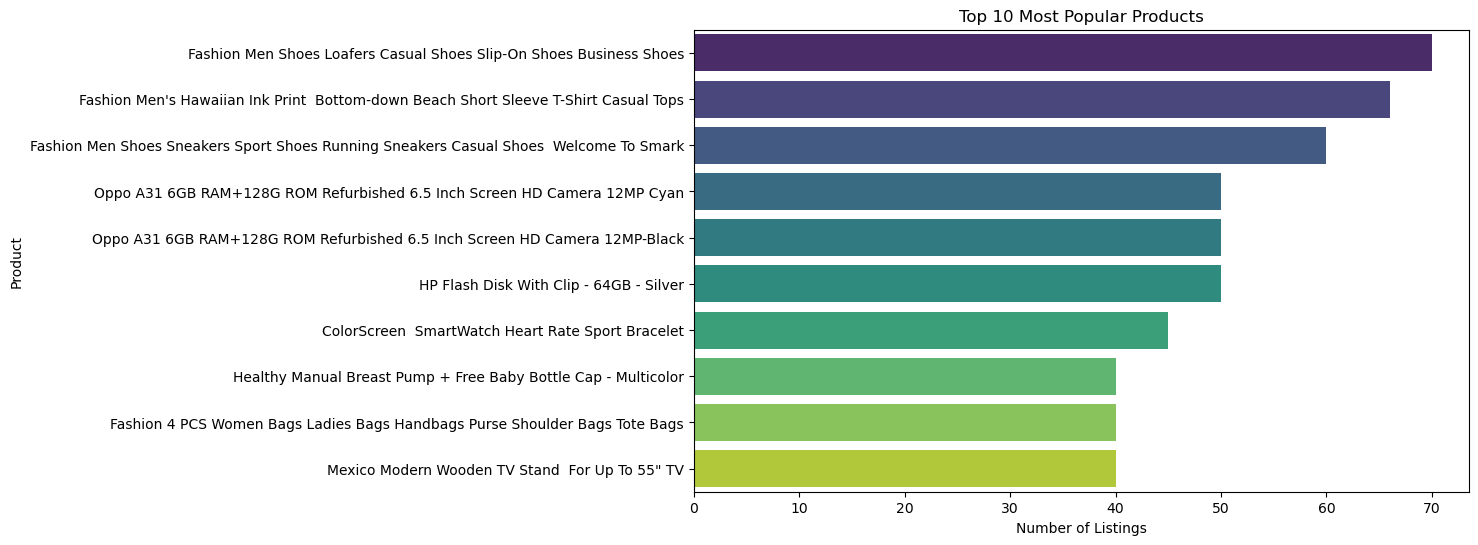

In [42]:
# Analyzing the most frequently listed products
plt.figure(figsize=(10, 6))
top_products = df_1['product_name'].value_counts().head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Most Popular Products')
plt.xlabel('Number of Listings')
plt.ylabel('Product')
plt.show()


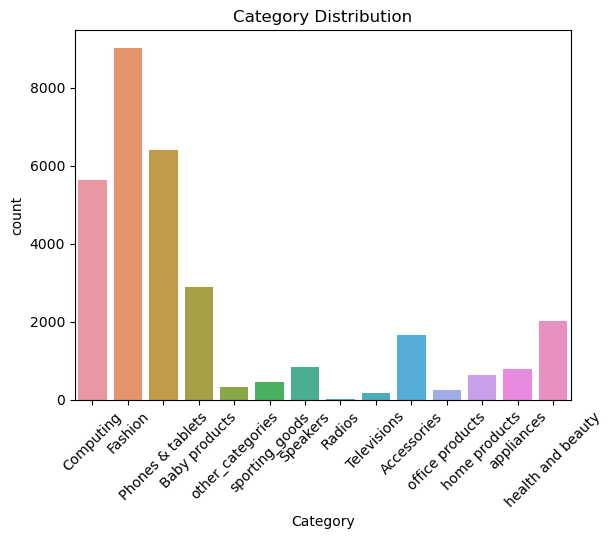

In [43]:
# Bar plot for categorical data
sns.countplot(data=df_1, x='Category')
plt.title('Category Distribution')
plt.xticks(rotation=45)
plt.show()

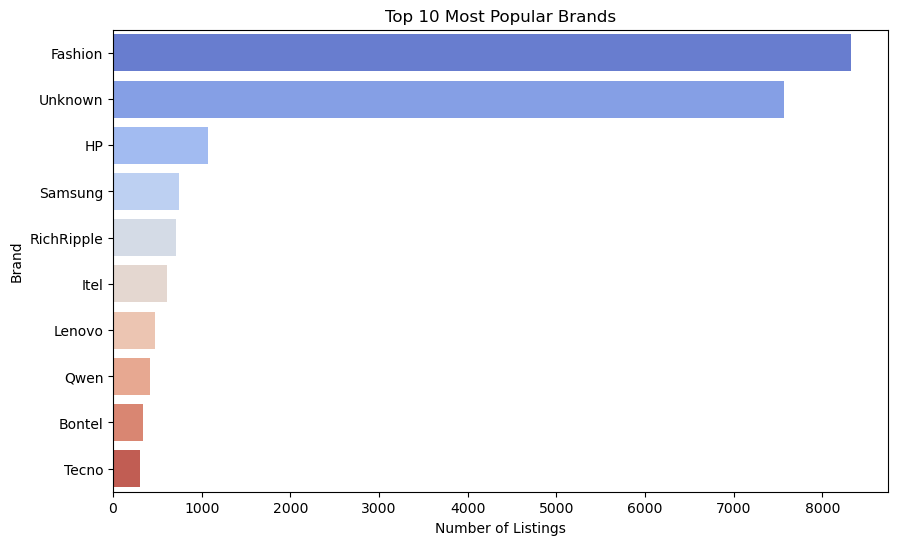

In [44]:
# Determine which brands are most popular or have higher interaction
plt.figure(figsize=(10, 6))
top_brands = df_1['brand'].value_counts().head(10)
sns.barplot(x=top_brands.values, y=top_brands.index, palette='coolwarm')
plt.title('Top 10 Most Popular Brands')
plt.xlabel('Number of Listings')
plt.ylabel('Brand')
plt.show()

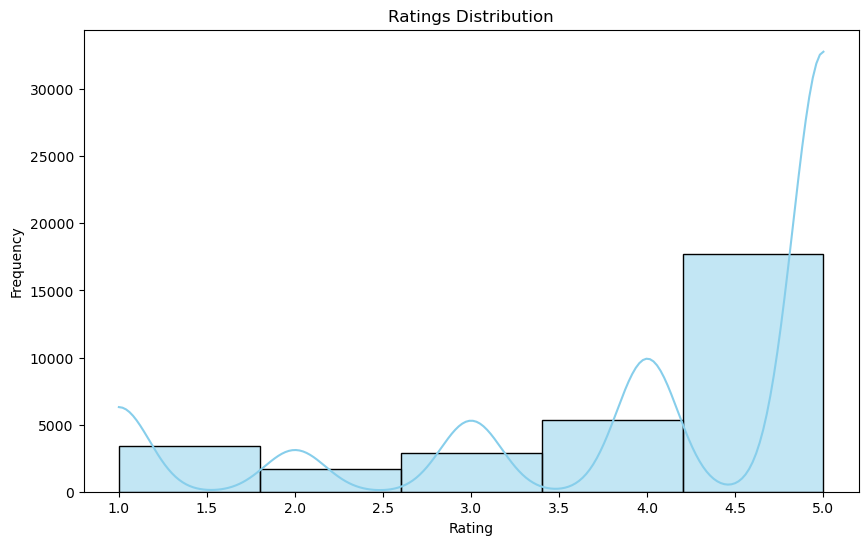

Percentage of products with reviews: 100.00%


In [45]:
# Check the distribution of ratings and analyze the presence of reviews to determine if customer feedback is available
# Rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_1['ratings'].dropna(), bins=5, kde=True, color='skyblue')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Percentage of products with reviews
review_count = df_1['review'].notnull().sum()
review_percentage = (review_count / len(df_1)) * 100
print(f"Percentage of products with reviews: {review_percentage:.2f}%")


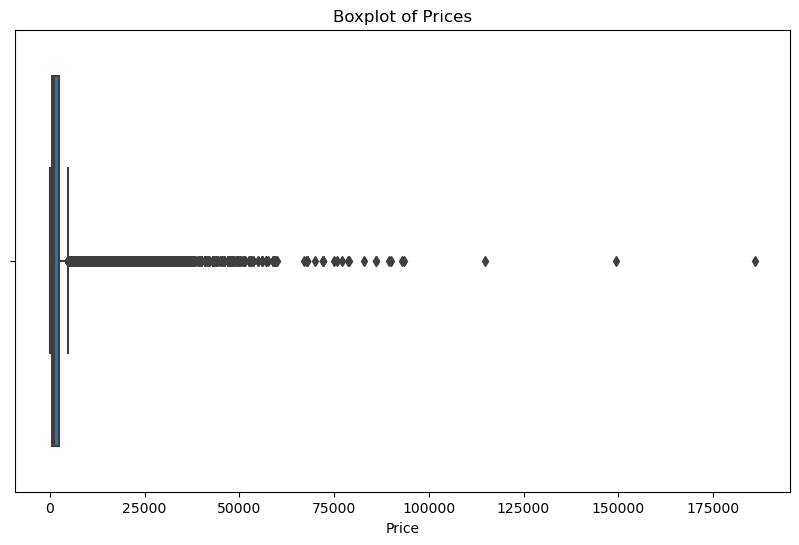

In [46]:
# Boxplot for price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_1['price'])
plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.show()

In [47]:
# Calculate IQR to detect outliers
Q1 = df_1['price'].quantile(0.25)
Q3 = df_1['price'].quantile(0.75)
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_1[df_1['price'] > threshold]
print("Number of outliers:", len(outliers))
print(outliers[['product_name', 'price']].sort_values(by='price', ascending=False))

Number of outliers: 5080
                                            product_name     price
42858  LG 75UP7760 75" UHD 4K HDR WebOS Smart AI Thin...  186000.0
50079  Ramtons RF/265 - 527L Side By Side LED Fridge ...  149300.0
35870  Sony PS5 Playstation 5 Console Standard Editio...  114899.0
51057  Ramtons RW/153- 12KG Front Load Washing Machin...   93500.0
50001  Samsung RT28K3082S8 Top Mount Freezer Refriger...   92999.0
...                                                  ...       ...
17830  Fashion African Men's Clothing / African Fashi...    4899.0
52494  Ramtons RG/518- 2 Burner Gas Cooker- Stainless...    4899.0
24599  Nokia C2-05 Slide Cell Phone Bluetooth FM Radi...    4880.0
14278  Sport Fashion Trend Men Casual Skate Shoes Mal...    4833.0
37973          Tent Hut 4 People Camping - 210x200x135cm    4808.0

[5080 rows x 2 columns]


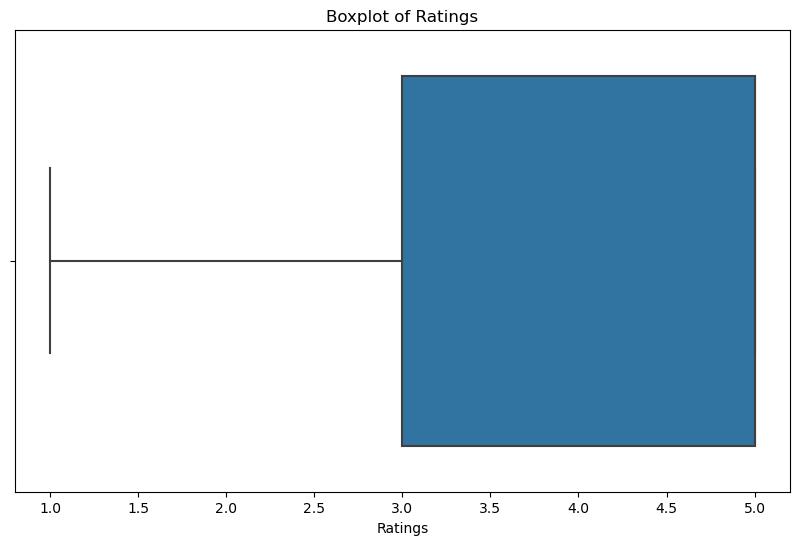

In [48]:
# Boxplot for ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_1['ratings'])
plt.title('Boxplot of Ratings')
plt.xlabel('Ratings')
plt.show()

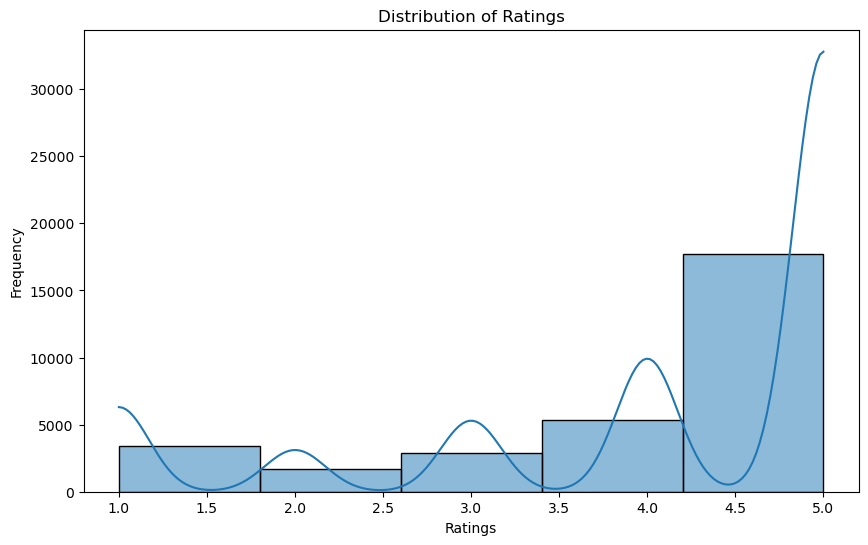

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df_1['ratings'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

In [50]:
def map_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [51]:
# Applying the function to the ratings column to create a new sentiment column
df_1['sentiment'] = df_1['ratings'].apply(map_sentiment)


In [52]:
# Checking the count of each sentiment category
sentiment_counts = df_1['sentiment'].value_counts()
print(sentiment_counts)


sentiment
Positive    23098
Negative     5092
Neutral      2864
Name: count, dtype: int64


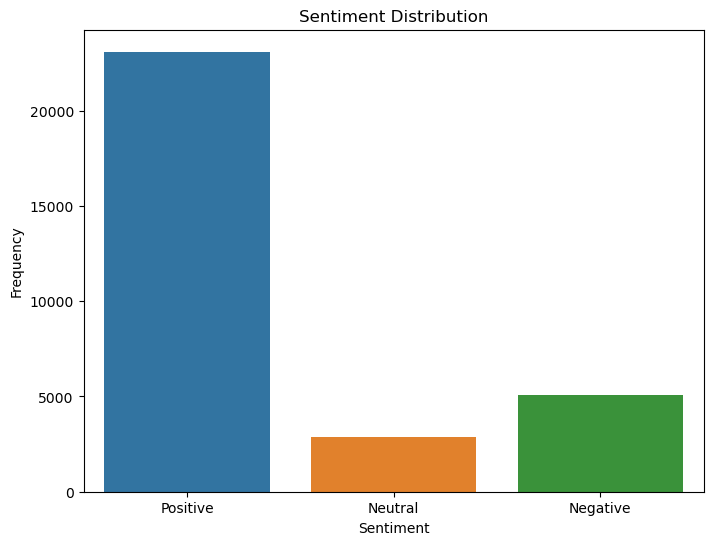

In [53]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_1, x='sentiment', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

In [54]:
# Grouping by Category to see sentiment counts per category
category_sentiment = df_1.groupby('Category')['sentiment'].value_counts(normalize=True).unstack()
print(category_sentiment)


sentiment          Negative   Neutral  Positive
Category                                       
Accessories        0.140097  0.079710  0.780193
Baby products      0.122917  0.090278  0.786806
Computing          0.147964  0.076294  0.775742
Fashion            0.195546  0.099380  0.705074
Phones & tablets   0.174178  0.104538  0.721283
Radios             0.206897  0.068966  0.724138
Speakers           0.151914  0.100478  0.747608
Televisions        0.061111  0.061111  0.877778
appliances         0.132743  0.088496  0.778761
health and beauty  0.126683  0.079302  0.794015
home products      0.200000  0.093548  0.706452
office products    0.178138  0.093117  0.728745
other_categories   0.155280  0.093168  0.751553
sporting_goods     0.167038  0.091314  0.741648


In [55]:
# Grouping by brand to see sentiment counts per brand
brand_sentiment = df_1.groupby('brand')['sentiment'].value_counts(normalize=True).unstack()
print(brand_sentiment)

sentiment          Negative   Neutral  Positive
brand                                          
24 7 FASHION            NaN       NaN  1.000000
3D Fashion         0.071429  0.214286  0.714286
7 Day              0.333333       NaN  0.666667
915 Generation          NaN       NaN  1.000000
A D Fashion Style  1.000000       NaN       NaN
...                     ...       ...       ...
silver crest       0.571429       NaN  0.428571
sm baby                 NaN  1.000000       NaN
tenda              0.078652  0.011236  0.910112
tommee tippee           NaN       NaN  1.000000
tretinoin               NaN       NaN  1.000000

[658 rows x 3 columns]


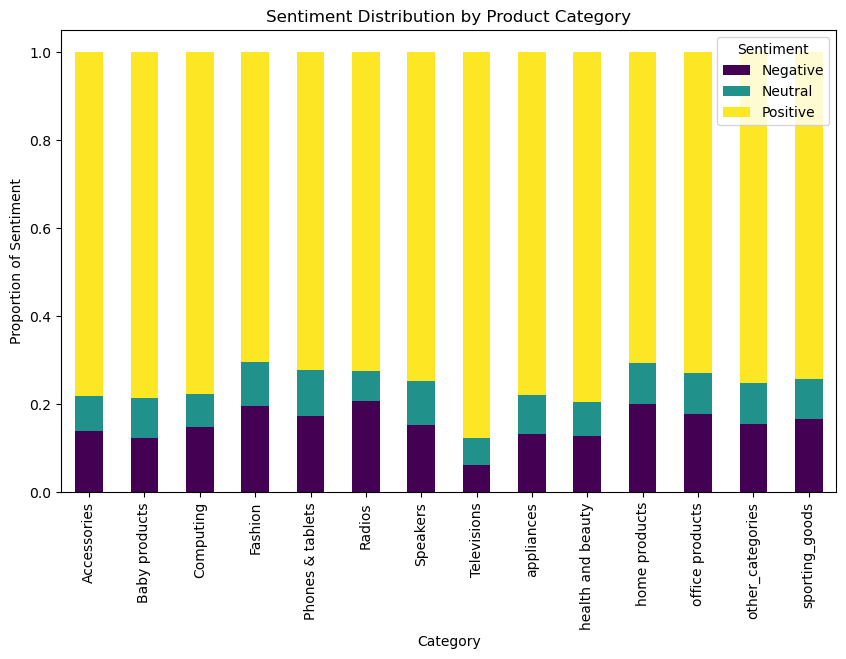

In [56]:
# Stacked bar chart for sentiment by category
category_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Sentiment Distribution by Product Category")
plt.xlabel("Category")
plt.ylabel("Proportion of Sentiment")
plt.legend(title="Sentiment")
plt.show()

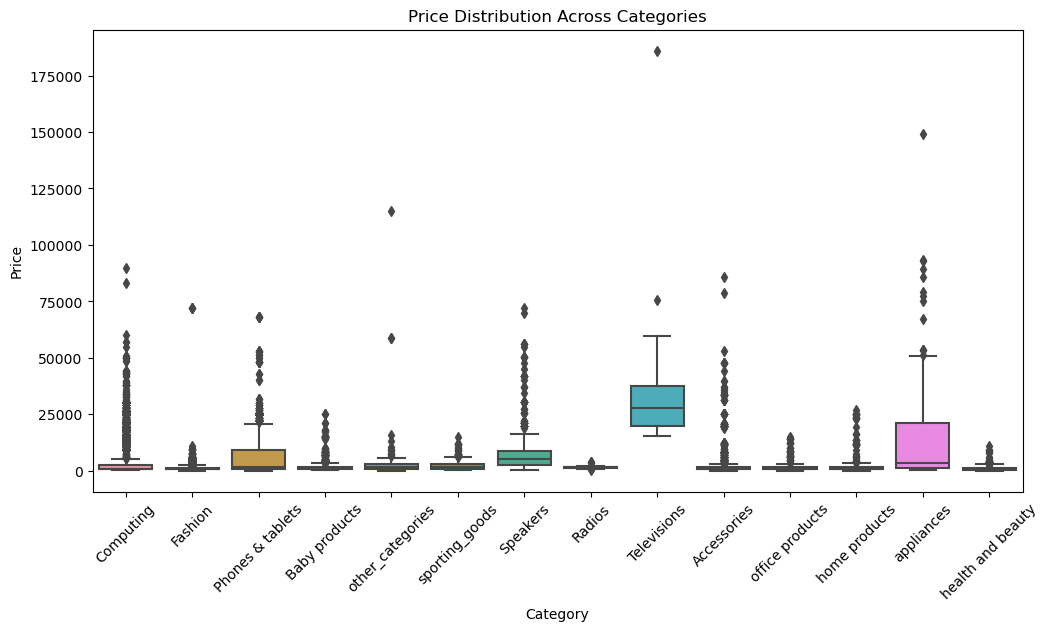

In [57]:
# Boxplot of price across different categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='price', data=df_1)
plt.title('Price Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [58]:
# Frequency distribution of categories
category_counts = df_1['Category'].value_counts()
print("Category distribution:\n", category_counts.head(10))

Category distribution:
 Category
Fashion              9026
Phones & tablets     6390
Computing            5623
Baby products        2880
health and beauty    2005
Accessories          1656
Speakers              836
appliances            791
home products         620
sporting_goods        449
Name: count, dtype: int64


In [59]:
# Frequency distribution of brands
brand_counts = df_1['brand'].value_counts()
print("Brand distribution:\n", brand_counts.head(10))

Brand distribution:
 brand
Fashion       8325
Unknown       7570
HP            1069
Samsung        740
RichRipple     715
Itel           614
Lenovo         470
Qwen           412
Bontel         341
Tecno          303
Name: count, dtype: int64


In [60]:
print("Basic statistics for price:\n", df_1['price'].describe())

Basic statistics for price:
 count     31054.000000
mean       3469.188768
std        6834.694354
min          51.000000
25%         629.000000
50%        1050.000000
75%        2299.000000
max      186000.000000
Name: price, dtype: float64


In [61]:
print("Basic statistics for ratings:\n", df_1['ratings'].describe())

Basic statistics for ratings:
 count    31054.000000
mean         4.041090
std          1.366307
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: ratings, dtype: float64


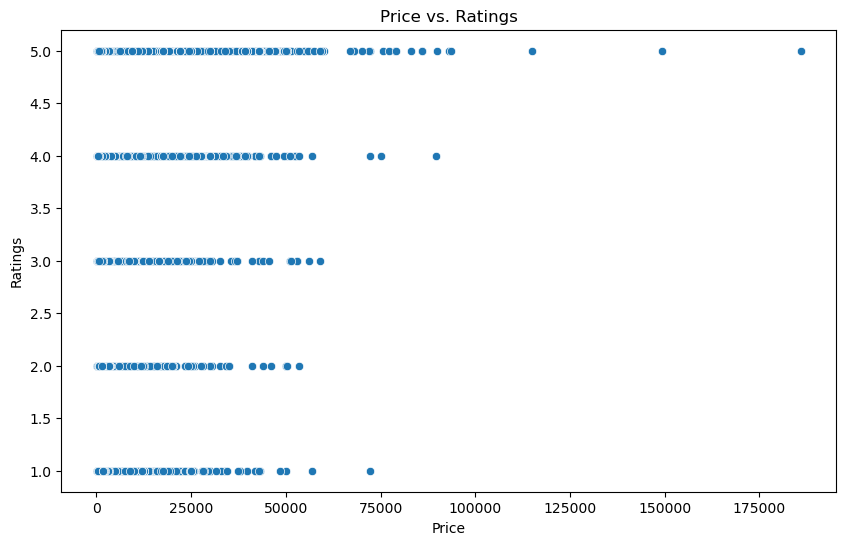

In [62]:
# Scatter plot of price vs. ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_1['price'], y=df_1['ratings'])
plt.title('Price vs. Ratings')
plt.xlabel('Price')
plt.ylabel('Ratings')
plt.show()

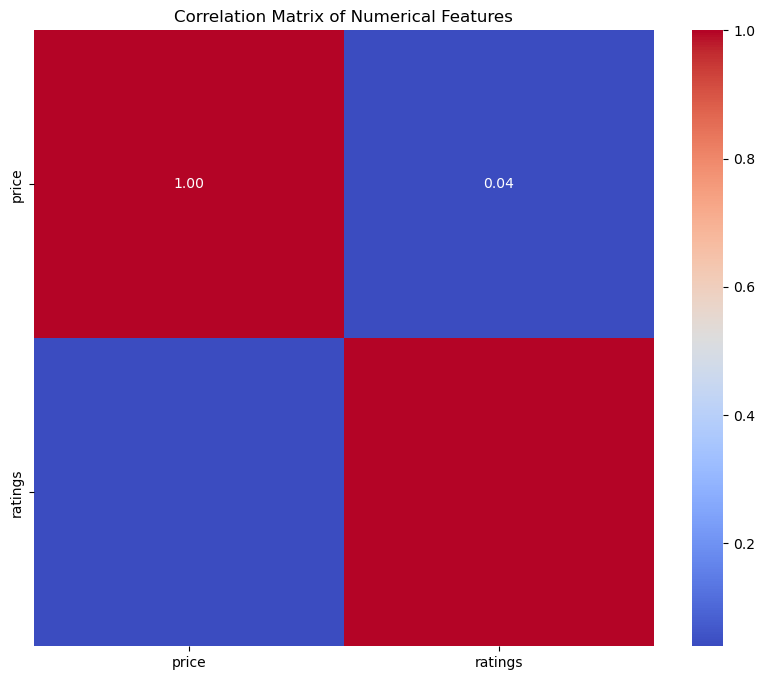

In [63]:
# Correlation matrix for numerical columns
numerical_cols = ['price', 'ratings']
plt.figure(figsize=(10, 8))
sns.heatmap(df_1[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

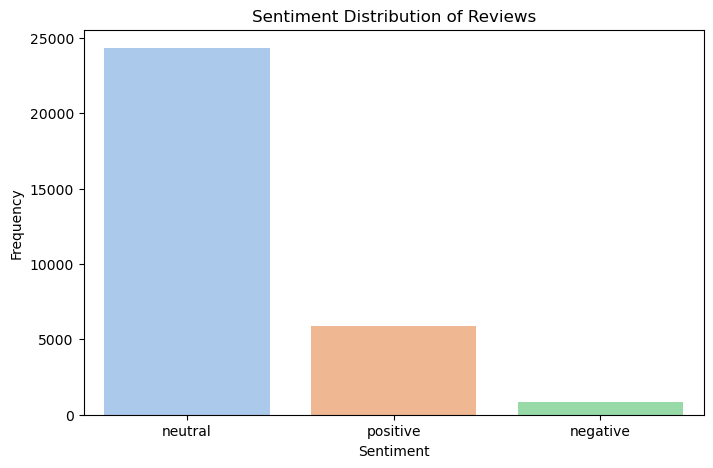

In [64]:
# Basic sentiment tagging based on keywords
df_1['sentiment'] = df_1['review'].str.lower().apply(lambda x: 'positive' if 'good' in str(x) or 'excellent' in str(x) 
                                                else ('negative' if 'bad' in str(x) or 'poor' in str(x) else 'neutral'))

# Sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df_1, palette='pastel')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


In [65]:
# Analyze the distribution of items across different subcategories
subcategory_counts = df_1['subcategory'].value_counts()
subcategory_counts

subcategory
mobile-phones               1336
#catalog-listing            1126
mobile-accessories           986
?price=0-1000                838
computer-accessories         803
                            ... 
outdoor-decor                  1
biography-autobiography        1
education-learning-books       1
skin-care-sets-kits            1
kettles                        1
Name: count, Length: 193, dtype: int64

In [66]:
# Filtering subcategories with a higher count for easier analysis
popular_subcategories = df_1['subcategory'].value_counts()[df_1['subcategory'].value_counts() > 100].index
df_1_popular = df_1[df_1['subcategory'].isin(popular_subcategories)]

In [67]:
# Group rare subcategories as "Other"
df_1['subcategory'] = df_1['subcategory'].apply(lambda x: x if df_1['subcategory'].value_counts()[x] > 5 else 'Other')

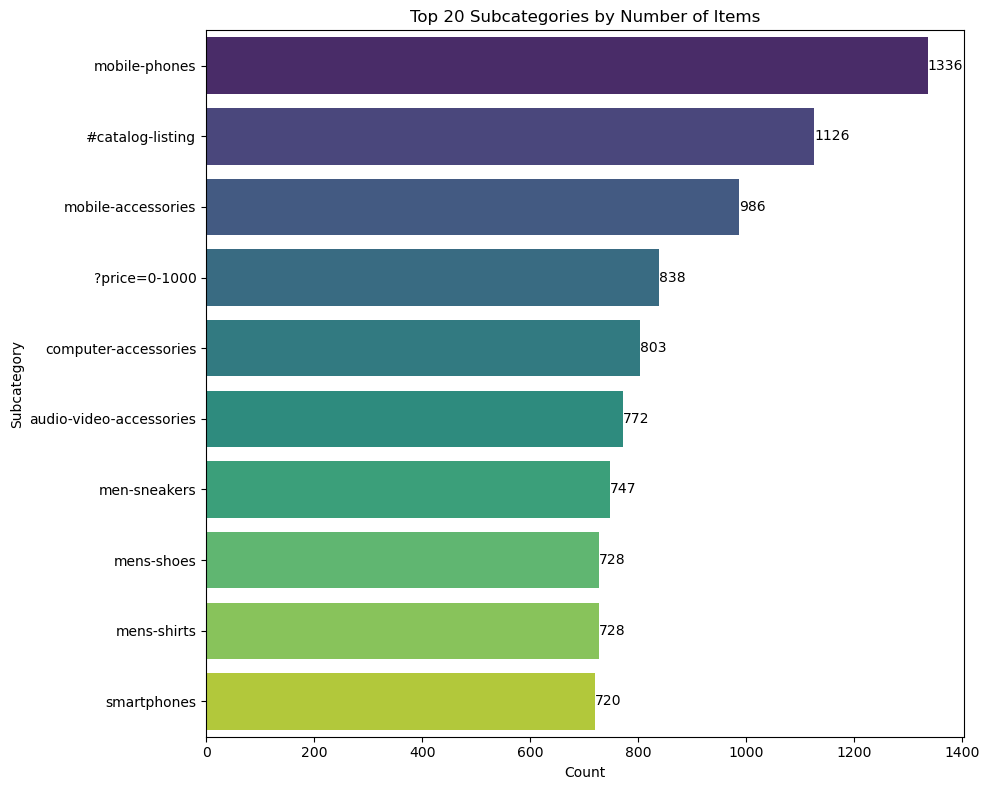

In [68]:
# Bar Plot for Subcategory Count to get a sense of distribution
# Sort subcategories in descending order and select the top 20
subcategory_counts = df_1['subcategory'].value_counts().head(10)

plt.figure(figsize=(10, 8))
sns.barplot(
    y=subcategory_counts.index,
    x=subcategory_counts.values,
    palette="viridis"
)
plt.xlabel("Count")
plt.ylabel("Subcategory")
plt.title("Top 20 Subcategories by Number of Items")

# Adding value annotations
for index, value in enumerate(subcategory_counts.values):
    plt.text(value, index, str(value), va='center')  # Adding values next to bars

plt.tight_layout()
plt.show()

In [69]:
# average ratings and prices for each subcategory
subcategory_stats = df_1.groupby('subcategory').agg({
    'ratings': 'mean',
    'price': 'mean'
}).sort_values(by='ratings', ascending=False)
print(subcategory_stats)

                                           ratings        price
subcategory                                                    
sports-endurance-energy-supplements       4.857143  2432.142857
sports-endurance-energy-endurance-energy  4.857143  2432.142857
christian-books-bibles                    4.722222  1446.722222
skin-care-lotions                         4.720430   864.134409
hair-shampoos-d                           4.690476  1044.071429
...                                            ...          ...
internal-phone-batteries                  3.325758  2025.590909
womens-skirts                             3.323529   622.367647
mens-hair-loss-treatments-d               3.285714  1198.959184
automobile-lights-lighting-accessories    3.238095  1205.452381
sports-nutrition-weight-gainers           3.100000  1804.400000

[177 rows x 2 columns]


In [70]:
df_1 = pd.get_dummies(df_1, columns=['brand'], prefix='brand', drop_first=True)

In [71]:
df_1.head()

,web-scraper-order,product_name,image,price,review_title,review,ratings,user_name,date,Category,...,brand_Zimeitu,brand_Zoe,brand_carter's baby,brand_cloudoon,brand_miralux,brand_silver crest,brand_sm baby,brand_tenda,brand_tommee tippee,brand_tretinoin
1,1730407112-2,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,3325.0,OKAY,"Working, feels cheap",3.0,WILFRED,2022-04-28,Computing,...,False,False,False,False,False,False,False,False,False,False
2,1730407112-3,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,3325.0,okay,A bit big for a regular laptop bag... The fanc...,4.0,Michael,2021-07-08,Computing,...,False,False,False,False,False,False,False,False,False,False
29,1730407173-30,Toshiba High Speed Micro SD Memory Card,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,803.0,good,genuine,4.0,your name,2021-11-29,Computing,...,False,False,False,False,False,False,False,False,False,False
30,1730407177-31,Lenovo Laptop Charger For Lenovo ThinkPad Yoga...,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,4157.0,I like it,It worked out well,1.0,Bathsheba,2020-10-31,Computing,...,False,False,False,False,False,False,False,False,False,False
37,1730407197-38,"Safaricom, Airtel & Telkom -4G/3G Universal Modem",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,2600.0,Works well,So far so good...,5.0,Ngarachu,2024-06-11,Computing,...,False,False,False,False,False,False,False,False,False,False


#### FEATURE ENGINEERING/ PREPROCESSING

In [72]:
# Calculate review count per product
df_1['review_count'] = df_1.groupby('product_name')['ratings'].transform('count')

In [73]:
# Calculate average rating per product
df_1['avg_rating'] = df_1.groupby('product_name')['ratings'].transform('mean')

In [74]:
# Display a sample of the data to confirm new features
df_1[['product_name', 'ratings', 'review_count', 'avg_rating']].sample(10)

,product_name,ratings,review_count,avg_rating
3046,"Hard Disk Casing External 2.5"" Hard Disk Drive...",5.0,20,4.400000
18536,Fashion Men Muscle Hoodie Vest Sleeveless Pure...,5.0,10,4.700000
44094,"MK Electronics 14-43"" Strong TV Wall Mount Bra...",2.0,10,3.600000
18892,Fashion LED Digital Quartz Fashion Watch Sport...,5.0,10,3.300000
48047,Neelux Rechargeable Mosquito And Flies Killer ...,4.0,2,2.500000
6524,HP EliteBook 820 G3 Intel Core I7 6th Gen 8GB ...,5.0,3,4.666667
10497,Fashion Computer Glasses Anti Blue Light Glass...,5.0,4,5.000000
38930,Dr. Rashel Slimming Slim Line Hot Cream,2.0,2,2.500000
2395,USB To HDMI Converter,1.0,1,1.000000
31929,Baby Cot Mosquito Net - Sky Blue,2.0,15,4.533333


In [75]:
#Fill missing ratings with the overall mean
df_1['avg_rating'].fillna(df_1['ratings'].mean(), inplace=True)

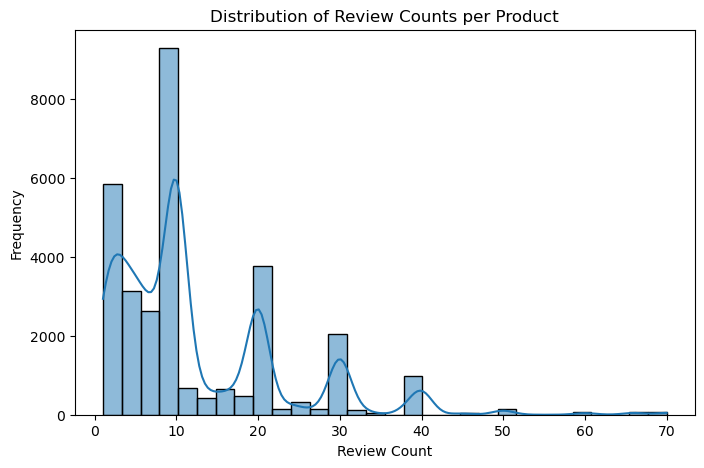

In [76]:
# Plotting review_count distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_1['review_count'], kde=True, bins=30)
plt.title('Distribution of Review Counts per Product')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.show()

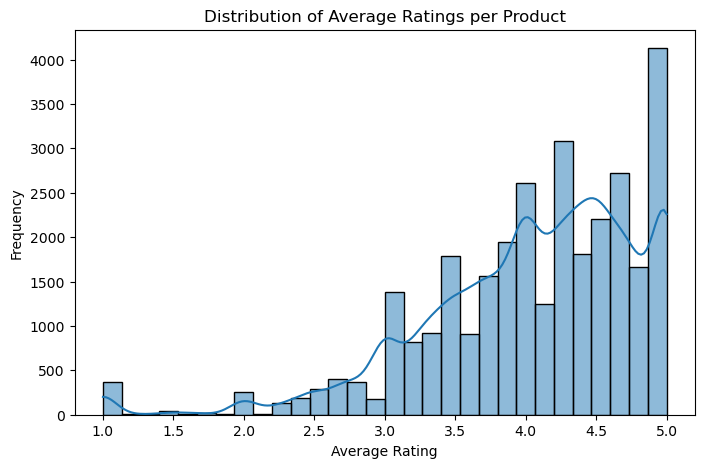

In [77]:
# Plotting avg_rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_1['avg_rating'], kde=True, bins=30)
plt.title('Distribution of Average Ratings per Product')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

#### SENTIMENT ANALYSIS

In [78]:
sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
df_1['sentiment_encoded'] = df_1['sentiment'].map(sentiment_mapping)

In [79]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hanan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hanan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hanan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [80]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\W', ' ', text)  # Remove punctuation
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text) # Remove mentions
    text = re.sub(r'#\w+', '', text) # Remove hashtags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces

# Tokenize, remove stopwords, and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stop_words]

    # Join tokens back into a single string
    return ' '.join(tokens)

In [81]:
# Apply function toreview column
df_1['cleaned_text'] = df_1['review'].apply(preprocess_text)
print(df_1['cleaned_text'].head())

1                                    working feel cheap
2     bit big regular laptop bag fancy blue light re...
29                                              genuine
30                                          worked well
37                                             far good
Name: cleaned_text, dtype: object


In [82]:
X = df_1['cleaned_text']  
y = df_1['sentiment']     

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words for simplicity

# Fit and transform on train set, transform on test set
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [84]:
# Encode sentiment labels
#label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y)  # Convert sentiments to numeric classes
#print("Classes:", label_encoder.classes_)

#### MODELLING

Baseline Models

1. Logistic Regression 

In [85]:
# Initialize and train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [86]:
# Predict on test set
y_pred = log_reg.predict(X_test_tfidf)

In [87]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9908
Precision: 0.9909
Recall: 0.9908
F1-Score: 0.9907


In [88]:
# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.86      0.92       168
     neutral       0.99      1.00      0.99      4874
    positive       1.00      0.97      0.99      1169

    accuracy                           0.99      6211
   macro avg       1.00      0.94      0.97      6211
weighted avg       0.99      0.99      0.99      6211



Hyper parameter tuning with Grid Search

In [89]:
# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}


# Initialize GridSearch with Logistic Regression and the parameter grid
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='f1_weighted')

In [90]:
# Get best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

# Use best model for predictions
best_log_reg = grid_search.best_estimator_
y_pred_best = best_log_reg.predict(X_test_tfidf)

Best Parameters: {'C': 100, 'solver': 'lbfgs'}
Best F1-Score: 0.997085201603085


In [91]:
# Accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)

# Precision, Recall, F1-Score
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

# Display metrics for the best model
print(f"Best Model Accuracy: {accuracy_best:.4f}")
print(f"Best Model Precision: {precision_best:.4f}")
print(f"Best Model Recall: {recall_best:.4f}")
print(f"Best Model F1-Score: {f1_best:.4f}")

# Detailed classification report
print("\nClassification Report for Best Model:\n", classification_report(y_test, y_pred_best))


Best Model Accuracy: 0.9979
Best Model Precision: 0.9979
Best Model Recall: 0.9979
Best Model F1-Score: 0.9979

Classification Report for Best Model:
               precision    recall  f1-score   support

    negative       1.00      0.96      0.98       168
     neutral       1.00      1.00      1.00      4874
    positive       1.00      0.99      1.00      1169

    accuracy                           1.00      6211
   macro avg       1.00      0.99      0.99      6211
weighted avg       1.00      1.00      1.00      6211



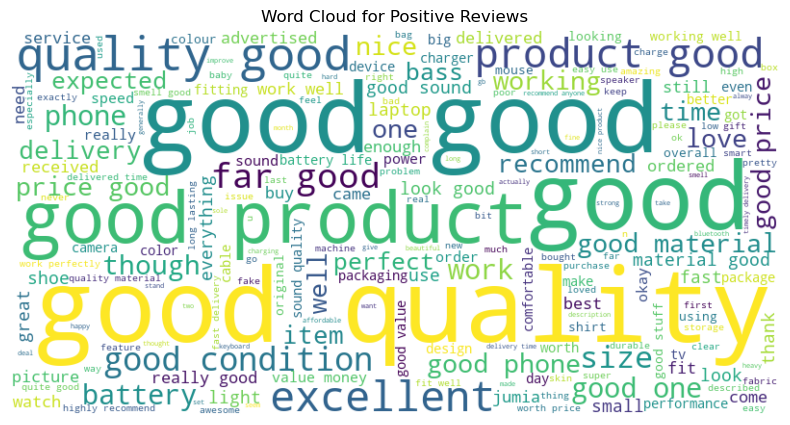

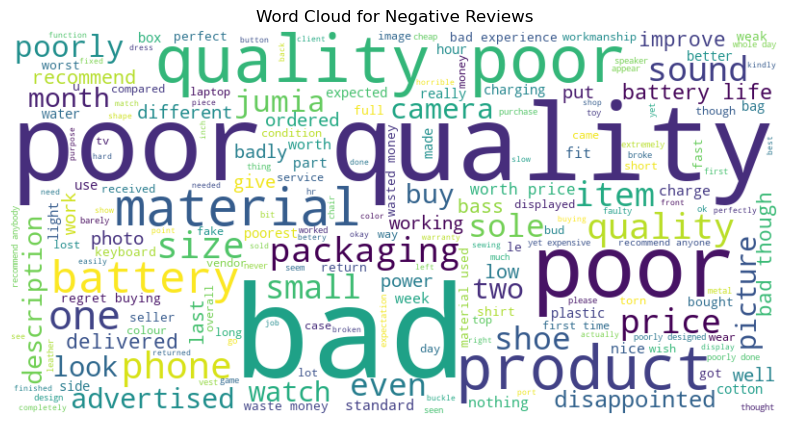

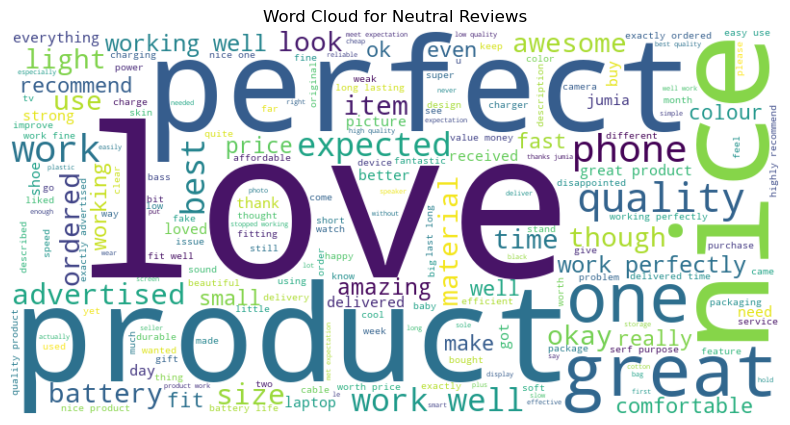

In [92]:
# Generate a WordCloud for positive, negative & neutral sentiment reviews
def plot_wordcloud(text_data, sentiment_label):
    text = " ".join(text_data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment_label} Reviews')
    plt.show()

plot_wordcloud(df_1[df_1['sentiment'] == 'positive']['cleaned_text'], 'Positive')
plot_wordcloud(df_1[df_1['sentiment'] == 'negative']['cleaned_text'], 'Negative')
plot_wordcloud(df_1[df_1['sentiment'] == 'neutral']['cleaned_text'], 'Neutral')

2. Naive Bayes

In [93]:
#Convert sentiment labels to binary
df_1['sentiment'] = df_1['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [94]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_1['review'], df_1['sentiment'], test_size=0.2, random_state=42)

In [95]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words for simplicity

# Fit the vectorizer on training data and transform both training and test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [96]:
# Initialize the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [97]:
# Predict sentiment for the test data
y_pred = nb_model.predict(X_test_tfidf)

In [98]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:\n", class_report)

Accuracy: 0.94
Confusion Matrix:
 [[5037    5]
 [ 381  788]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.93      1.00      0.96      5042
    Positive       0.99      0.67      0.80      1169

    accuracy                           0.94      6211
   macro avg       0.96      0.84      0.88      6211
weighted avg       0.94      0.94      0.93      6211



Hyper parameter tuning with Grid Search

In [99]:
# Define parameters for GridSearch
param_grid = {'alpha': [0.1, 0.5, 1, 5, 10]}

# Initialize GridSearch with cross-validation
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1, 5, 10]}, scoring='accuracy')

In [100]:
# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Score:", grid_search.best_score_)

Best Parameters: {'alpha': 0.1}
Best Cross-Validated Score: 0.9594248592481112


In [101]:
# Use the best alpha value to train a new model
best_alpha = grid_search.best_params_['alpha']
nb_model_tuned = MultinomialNB(alpha=best_alpha)
nb_model_tuned.fit(X_train_tfidf, y_train)

# Make predictions and evaluate the tuned model
y_pred_tuned = nb_model_tuned.predict(X_test_tfidf)

In [102]:
# Evaluate
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Accuracy (Tuned): {accuracy_tuned:.2f}')

Accuracy (Tuned): 0.96


In [103]:
# Confusion matrix and classification report for tuned model
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned, target_names=['Negative', 'Positive'])
print("Tuned Confusion Matrix:\n", conf_matrix_tuned)
print("Tuned Classification Report:\n", class_report_tuned)

Tuned Confusion Matrix:
 [[5024   18]
 [ 230  939]]
Tuned Classification Report:
               precision    recall  f1-score   support

    Negative       0.96      1.00      0.98      5042
    Positive       0.98      0.80      0.88      1169

    accuracy                           0.96      6211
   macro avg       0.97      0.90      0.93      6211
weighted avg       0.96      0.96      0.96      6211



#### Advanced Model

1. XG Boost 

In [ ]:
# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Calculate metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print(f"XGBoost - Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")

Hyper parameter tuning with Grid Search

In [ ]:
# Define parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [ ]:
# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='f1_weighted')

# Fit the model
grid_search_xgb.fit(X_train, y_train)

In [ ]:
# Best parameters and best score
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best F1 Score for XGBoost:", grid_search_xgb.best_score_)

# Use the best model
best_xgb_model = grid_search_xgb.best_estimator_

In [ ]:
# Comparing the models
models = {
    "Decision Tree": best_dt_model,
    "Random Forest": best_rf_model,
    "XGBoost": best_xgb_model
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"{model_name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

#### RECOMMENDATION SYSTEM

In [107]:
item_ratings_matrix = df_1.pivot_table(index='product_name', columns='user_name', values='ratings').fillna(0)

In [109]:
# Setting the number of latent factors
n_factors = 50

# Initialize and fit Truncated SVD on item ratings matrix
svd = TruncatedSVD(n_components=n_factors, random_state=42)
item_latent_matrix = svd.fit_transform(item_ratings_matrix)

# Convert reduced item latent matrix back to a DataFrame
item_latent_df = pd.DataFrame(item_latent_matrix, index=item_ratings_matrix.index)

In [112]:
# Calculate cosine similarities in the reduced space
item_similarities = cosine_similarity(item_latent_df)
item_similarities_df = pd.DataFrame(item_similarities, index=item_latent_df.index, columns=item_latent_df.index)

In [117]:
print(item_similarities_df.index)

Index(['(1,2,3 Or 4 Pcs) Over The Door Hanger',
       '(1,2,3 Or 4 Pcs) Over The Door Hanger-white',
       '(4 In 1)4 In 1 Hydrogel Film For Samsung Galaxy S23 S22 S21 S20 FE S8 S9 S10 S10E Note 8 9 10 Plus 20 Ultra Screen Lens Protector Film',
       '(Only Case) Silicone Protective Case Cover Storage Box For AirPods Pro 3 Bluetooth Earphone-Purple',
       '(only Case) Anti-falling Anti-scratch Soft Silicone Earphone Protective Case For AirPods 1/2-Black',
       '1 Din Car Stereo Radio AM/FM Bluetooth Stereo Mp3 Player Voice Control 2 Usb',
       '1 Pair Men Shirt Stay Shirt Holder Garter Belt Clip Non',
       '1 Pair Women Ring Lady Wedding Ring',
       '1.2 M X 5 M Premium Eco Bubble Wrap (120CM X 500CM)',
       '1.2M Computer Office Desk Workstation With Metal Frame (Unassembled)',
       ...
       'sm baby  PP1-Grade4 Cute Water-Repellent, Easy To Clean Quality Kids School Bags',
       'tenda 300 Mbps Wireless WiFi Easy Setup Router',
       'tenda 300Mbps Wireless WiFi 

In [118]:
# Build a recommendation Function
def recommend_items(product_name, num_recommendations=5):
    # Retrieve similarity scores for the specified product
    sim_scores = item_similarities_df[product_name]
    sim_scores = sim_scores.sort_values(ascending=False)

    # Get the top recommendations, excluding the input product itself
    top_items = sim_scores.iloc[1:num_recommendations + 1].index
    top_scores = sim_scores.iloc[1:num_recommendations + 1].values

    recommendations = list(zip(top_items, top_scores))
    return recommendations

# Get recommendations for a specific product
recommendations = recommend_items('1.2M Computer Office Desk Workstation With Metal Frame (Unassembled)')
print("Recommendations:", recommendations)


Recommendations: [('Toshiba 1TB - Internal Desktop Hard Disk - Silver', 1.0), ('LASA 4K HDMI 2.0 60/30hz 1.5m Flat Cable', 1.0), ("Men's Tactical Belt, Aluminum Alloy Military Tactical Belt, Outdoor Sports Belt", 1.0), ('HP TYPE-C 20V 3.25A Laptop Charger For ELITEBOOK X360 1030 G2', 1.0), ('MK ® RGB Wireless Bluetooth Speakers Portable Sound Box Car Audio Bass Lights', 1.0)]


In [119]:
# Visualize Similrity
plt.figure(figsize=(10, 8))
sns.heatmap(item_similarities_df, cmap="YlGnBu", xticklabels=item_ratings_matrix.index, yticklabels=item_ratings_matrix.index)
plt.title("Item Similarity Heatmap")
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A3D00B0B80> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Testing & Evaluation

In [121]:
sample_items = ['1 Pair Men Shirt Stay Shirt Holder Garter Belt Clip Non', 'tenda 300 Mbps Wireless WiFi Easy Setup Router', 'tretinoin TRETINO Cream 0.05% Retin-A For Skin Repair Exfoliate Glow!']  

In [122]:
for item in sample_items:
    recommendations = recommend_items(item, num_recommendations=5)
    print(f"Recommendations for {item}:\n", recommendations)

Recommendations for 1 Pair Men Shirt Stay Shirt Holder Garter Belt Clip Non:
 [('Nunix 2 In 1 Glass Blender With Power Grinding Machine AK-500', 0.9910583220571813), ('Rashnik RN-999 2 In 1 Blender & Grinder â\x80\x931.5L â\x80\x93 350W - Black', 0.9896097738948847), ('Wireless Music Receiver Bluetooth Audio Receiver', 0.9896097738948847), ('HP Refurbished 840 G3 Core I5 6th Gen 8GB, 128 GB SSD 500GB HDD WIN 11, Office 2019 Trial (6 Months WRTY)', 0.9896097738948847), ('T-WOLF T60 wired gaming keyboard optical switching machinery wired keyboard for laptop', 0.9895550750880205)]
Recommendations for tenda 300 Mbps Wireless WiFi Easy Setup Router:
 [('tenda 300 Mbps Wireless WiFi Easy Setup Router', 1.0000000000000002), ('Seagate Laptop Internal 500GB Harddisk Drive.', 1.0000000000000002), ('Euroken Powerful Multimedia 2 In 1 Home Theater System', 1.0), ('Guardiola Turkey Style Suits', 1.0), ('Fashion Vintage Metal Round Frame Eyeglasses Frames Without Lenses', 1.0)]
Recommendations for t